In [2]:
from google.colab import files
import pandas as pd

# Upload both CSVs (hold Ctrl/Shift and select both together)
print("Please upload both USvideos.csv and INvideos.csv")
uploaded = files.upload()

# Load the datasets
df_us = pd.read_csv("USvideos.csv", encoding="latin-1")
df_in = pd.read_csv("INvideos.csv", encoding="latin-1")

# Add region columns
df_us["region"] = "US"
df_in["region"] = "India"

# Combine them into one dataframe
df = pd.concat([df_us, df_in], ignore_index=True)

print("US dataset shape:", df_us.shape)
print("India dataset shape:", df_in.shape)
print("Combined dataset shape:", df.shape)

# Show first few rows
df.head()

Please upload both USvideos.csv and INvideos.csv


Saving INvideos.csv to INvideos (1).csv
Saving USvideos.csv to USvideos.csv
US dataset shape: (40949, 17)
India dataset shape: (37352, 17)
Combined dataset shape: (78301, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

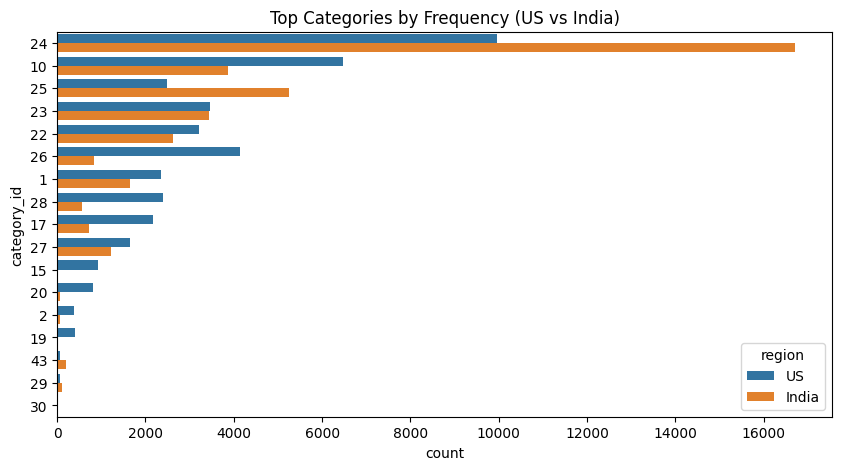

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(y=df["category_id"], order=df["category_id"].value_counts().index, hue=df["region"])
plt.title("Top Categories by Frequency (US vs India)")
plt.show()

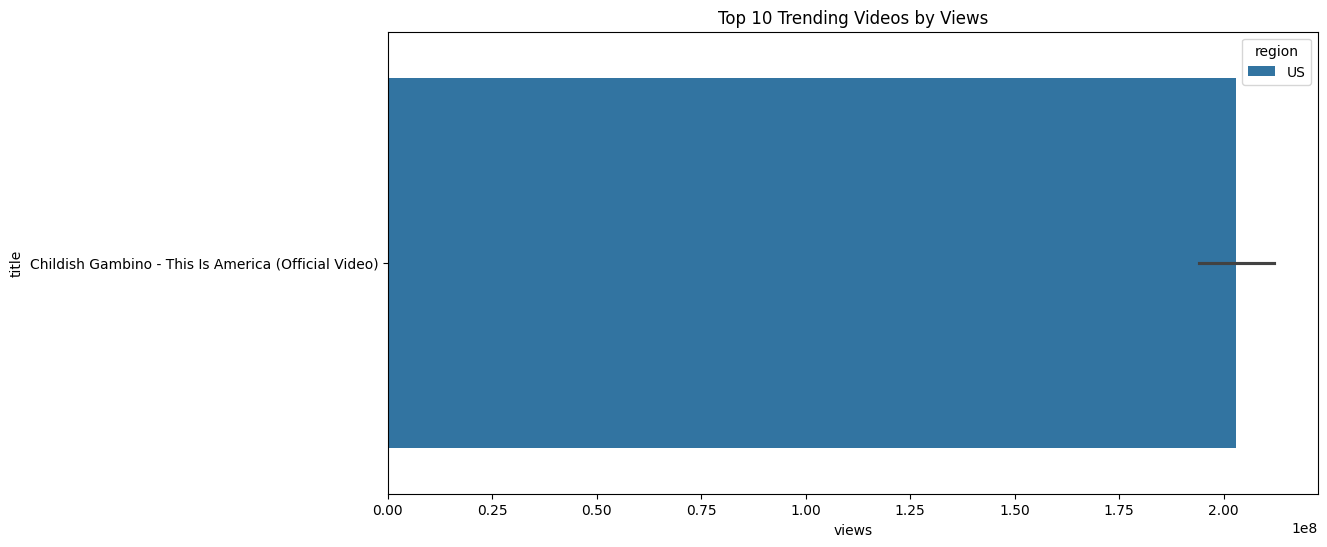

In [7]:
top_videos = df.sort_values(by="views", ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x="views", y="title", hue="region", dodge=False, data=top_videos)
plt.title("Top 10 Trending Videos by Views")
plt.show()


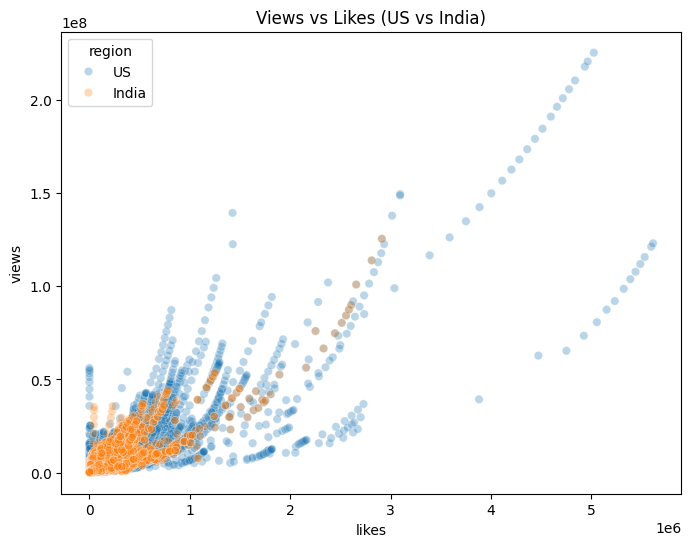

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="likes", y="views", hue="region", data=df, alpha=0.3)
plt.title("Views vs Likes (US vs India)")
plt.show()

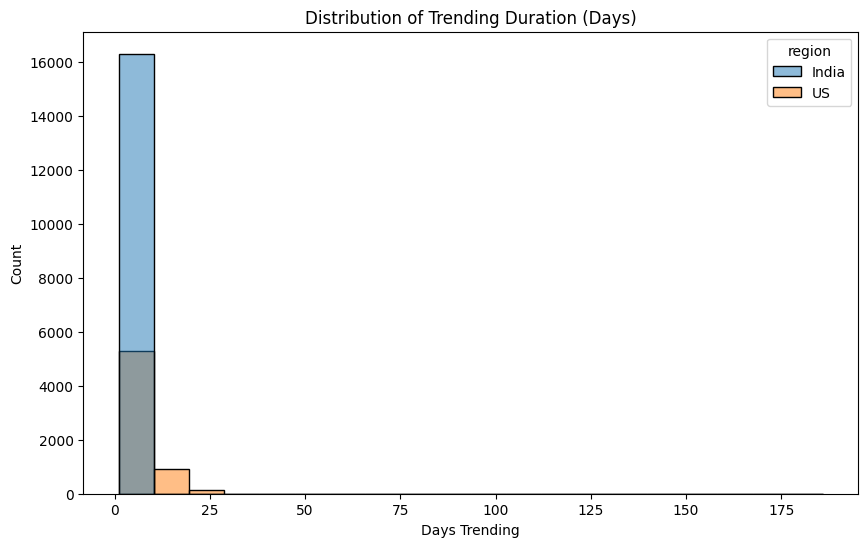

In [9]:
duration = df.groupby(["video_id","region"])["trending_date"].nunique().reset_index()
plt.figure(figsize=(10,6))
sns.histplot(data=duration, x="trending_date", hue="region", bins=20, kde=False)
plt.title("Distribution of Trending Duration (Days)")
plt.xlabel("Days Trending")
plt.show()

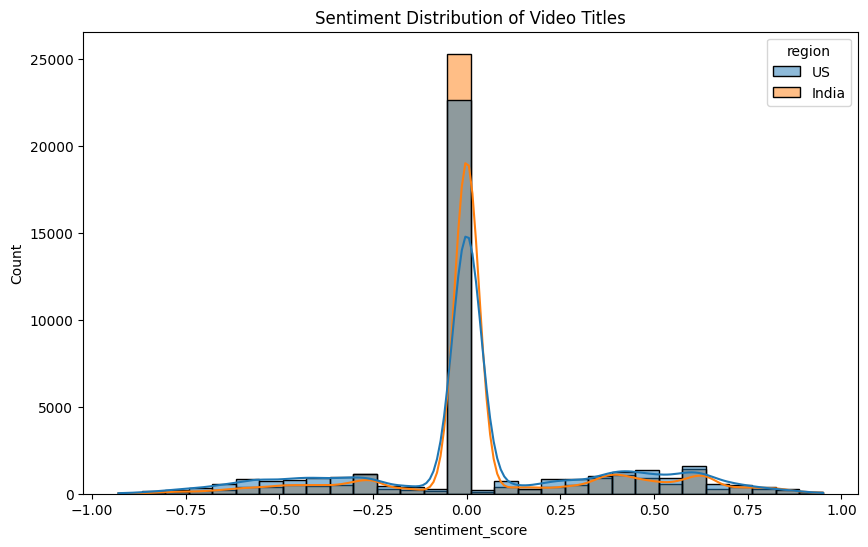

In [10]:
sia = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["title"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="sentiment_score", hue="region", bins=30, kde=True)
plt.title("Sentiment Distribution of Video Titles")
plt.show()

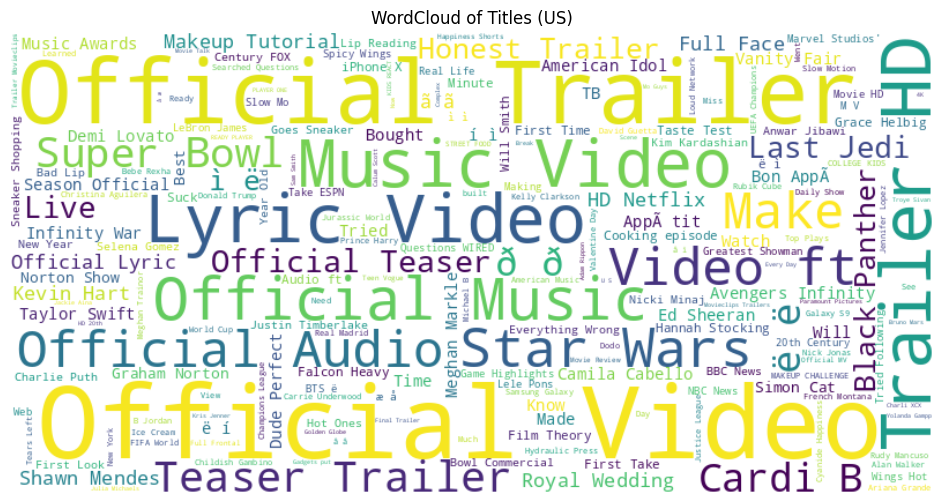

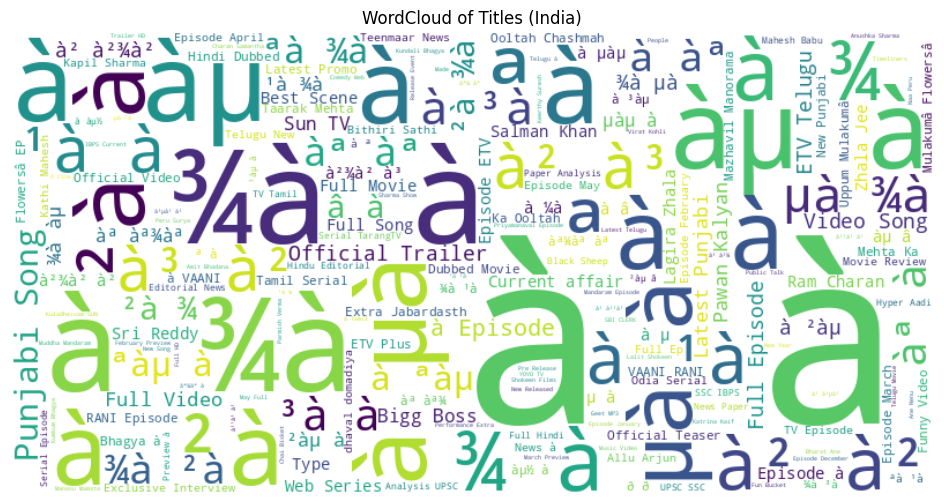

In [11]:
for r in ["US", "India"]:
    text = " ".join(df[df["region"]==r]["title"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud of Titles ({r})")
    plt.show()

In [12]:
print("1. Entertainment and Music dominate trending videos in both regions.")
print("2. Views and Likes are strongly correlated.")
print("3. Most videos trend for less than a week, with some long outliers.")
print("4. Titles are mostly neutral to positive in sentiment.")
print("5. Region comparison shows slight variation in category dominance.")

1. Entertainment and Music dominate trending videos in both regions.
2. Views and Likes are strongly correlated.
3. Most videos trend for less than a week, with some long outliers.
4. Titles are mostly neutral to positive in sentiment.
5. Region comparison shows slight variation in category dominance.
